In this notebook, DataGenerator is tested.

`DataGenerator` allows to feed a neural network model with data pumped from files.

This allows to train a model with hughe dataset.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="Test DataGenerator")

# <font color=blus>0. Notebook configuration</font>

In [35]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
import tensorflow as tf
import pandas as pd
import gensim


import p8_util
import p8_util_config
import p9_util
import DataGenerator

extension='_part'
#partition_size = 10000
#data_format='csr'
partition_size=1000
data_format='ndarray'

W0928 19:02:11.775443 140010563163968 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0928 19:02:11.776268 140010563163968 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

Using TensorFlow backend.
W0928 19:02:12.077856 140010563163968 deprecation_wrapper.py:119] From /home/bangui/Dropbox/Perso/Formation/openclassrooms/OC_Datascientist/Kaggle/p8_util_config.py:137: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



# <font color=blus>1. Loading dataset</font>

## <font color=blus>1.1. Loading TF-IDF </font>

In [3]:
import numpy as np
import p5_util
if data_format == 'csr' :
    filename = './data/vectorizer'+extension+'_tfidf.dump'
    vectorizer_sample = p5_util.object_load(filename)

    filename = './data/csr_matrix_train_sample'+extension+'_tfidf.dump'
    csr_matrix_train_sample = p5_util.object_load(filename)

    filename = './data/csr_matrix_test_sample'+extension+'_tfidf.dump'
    csr_matrix_test_sample = p5_util.object_load(filename)

    filename = './data/y_train_sample'+extension+'_tfidf.dump'
    y_train = p5_util.object_load(filename)

    filename = './data/y_test_sample'+extension+'_tfidf.dump'
    y_test = p5_util.object_load(filename)

    print("")
    print("Sample of train CSR matrix shape = {}".format(csr_matrix_train_sample.shape))
    print("Sample of train target shape     = {}".format(y_train.shape))
    print("")
    print("Sample of test CSR matrix shape  = {}".format(csr_matrix_test_sample.shape))
    print("Sample of test target shape      = {}".format(y_test.shape))
else :
    pass

## <font color=blus>1.2. Loading DataPreparator </font>

In [4]:
import numpy as np
import p5_util
if data_format == 'ndarray' :

    filename_train = './data/DataPreparator_train.dump'
    filename_test =  './data/DataPreparator_test.dump'

    if False :
        p5_util.object_dump(dataPreparator_train,filename_train)
        p5_util.object_dump(dataPreparator_test,filename_test)
    else : 
        dataPreparator_train = p5_util.object_load(filename_train)
        dataPreparator_test = p5_util.object_load(filename_test)

    print("")
    print("DataPretarator train lenth=  {}".format(len(dataPreparator_train)))
    print("DataPretarator test lenth=  {}".format(len(dataPreparator_test)))


p5_util.object_load : fileName= ./data/DataPreparator_train.dump
p5_util.object_load : fileName= ./data/DataPreparator_test.dump

DataPretarator train lenth=  45347
DataPretarator test lenth=  45432


# <font color=blus>2. DataGenerator Test</font>

## <font color=blus>2.1. Building partitions</font>

In [5]:
!rm ./data/train_X_*.*
!rm ./data/test_X_*.*

In [6]:
X_train, y_train = dataPreparator_train.transform(None, None)
X_test,  y_test  = dataPreparator_test.transform(None, None)


Clean already processed!

Counting column tokens already processed!

Already vectorized!

Clean already processed!

Counting column tokens already processed!

Already vectorized!


In [7]:
X_train.shape, X_test.shape

((45347, 112), (45432, 112))

In [8]:
import p9_util

dict_train_partition, dict_train_label = p9_util.make_partition(X_train, \
                                            y_train, partition_size,\
                                            data_type="train", data_format=data_format )

Building train partition...



In [9]:
import p9_util

dict_test_partition, dict_test_label = p9_util.make_partition(X_test, \
                                              y_test,partition_size,\
                                            data_type="test", data_format=data_format )

Building test partition...



## <font color=blus>2.2 Building DataGenerator</font>

    Parameters is common for train and test data generator.

In [10]:
import p9_util
embedding_dim=1
dimension = X_train.shape[1]
params = {'dim': (dimension,embedding_dim),
          'batch_size': 1000,
          'n_classes': 0,
          'n_channels': 1,
          'shuffle': True}
print(params)

{'dim': (112, 1), 'batch_size': 1000, 'n_classes': 0, 'n_channels': 1, 'shuffle': True}


    Building train and test generators.

In [57]:
# Data Generators
len_train = X_train.shape[0]
train_generator = DataGenerator.DataGenerator(dict_train_partition, dict_train_label, partition_size, len_train,**params)

len_test = X_test.shape[0]
test_generator = DataGenerator.DataGenerator(dict_test_partition, dict_test_label, partition_size,len_test, **params)


self = train_generator
len_train = self.len_data

print(self.dim)

(112, 1)


In [25]:
import p5_util

filname_train = "./data/train_generator.dump"
filname_test  = "./data/test_generator.dump"

if False:
    p5_util.object_dump(train_generator,filname_train)
    p5_util.object_dump(test_generator,filname_test)
    
else :
    train_generator = p5_util.object_load(filname_train)
    test_generator = p5_util.object_load(filname_test)

print(" ")
print("Train generator batchs= {} / Total texts= {}".format(len(train_generator),train_generator.len_data))
print("Test generator  batchs= {} / Total texts= {}".format(len(test_generator), test_generator.len_data))
params = train_generator.get_params()
print("Params= {}".format(params))

self = train_generator
len_train = self.len_data

print(self.dim)

(112, 1)


## <font color=blus>2.3 Testing DataGenerator</font>

### <font color=blus>2.3.1 Testing `get_dict_handle_listindex`</font>

In [ ]:
#-------------------------------------------------------------------------------
#
#-------------------------------------------------------------------------------
def get_dict_handle_listindex(self, list_batch_index) :
    #----------------------------------------------------------------------------
    # List of batch indexes is built from batch_size and index given as parameter
    #----------------------------------------------------------------------------

    start_batch_index = batch_index*self.batch_size
    end_batch_index   = min((batch_index+1)*self.batch_size,len_train)
    list_batch_index = self.indexes[start_batch_index:end_batch_index]
    if False :
        print("")
        print("Number of indexes in batch ={} / Start index batch= {} / End index batch= {}".\
              format(len(list_batch_index), start_batch_index, end_batch_index))
    
    #----------------------------------------------------------------------------
    # List of files-handles is built from batch indexes
    #----------------------------------------------------------------------------
    start_batch_index = list_batch_index[0]
    end_batch_index   = list_batch_index[-1]
    
    start_file_handle = start_batch_index//self.partition_size
    end_file_handle = (end_batch_index//self.partition_size)+1
    list_handle = [filehandle for filehandle in range(start_file_handle,end_file_handle)]
    if False :
        print("List of file-handles in batch= {}".format(list_handle))
    
    #----------------------------------------------------------------------------
    # Dictionary of files indexes is built from list fo files-handles
    #----------------------------------------------------------------------------
    start_file_index = start_batch_index
    dict_handle_listindex = dict()
    for handle in list_handle :
        # For the last file, end_batch_index is the last indexe of items.
        # It has to be reached from end_file_index. 
        # For doing so, end_batch_index+1 stands for end_file_index for last file 
        # from batch.
        end_file_index = min((handle+1)*self.partition_size,end_batch_index+1)
        shift_index = handle*self.partition_size
        dict_handle_listindex[handle] = [index-shift_index for index in range(start_file_index,end_file_index)]
        if False :
            print("File handle= {} / Start index= {} / End index={} / Number elements= {}"\
                  .format(handle, start_file_index, end_file_index-1, len(dict_handle_listindex[handle])))
        start_file_index = end_file_index
    return dict_handle_listindex
#-------------------------------------------------------------------------------

In [ ]:
print("Number of batchs in data generator= {}".format(len(self)))
print("Number of items in data generator= {}".format(len_train))
#-----------------------------------------------------
# This loop simulates Keras batch processing
#-----------------------------------------------------
for batch_index in range(0,len(self)):
    print(" ")
    #----------------------------------------------------------------------------
    # List of batch indexes is built from batch_size and index given as parameter
    #----------------------------------------------------------------------------
    start_batch_index = batch_index*self.batch_size
    end_batch_index   = min((batch_index+1)*self.batch_size,len_train)
    list_batch_index = self.indexes[start_batch_index:end_batch_index]
    print("Batch length : {}".format(len(list_batch_index)))
    
    dict_handle_listfileindex = get_dict_handle_listindex(self, list_batch_index)
    if True :
        for key in dict_handle_listfileindex.keys():
            print("File handle= {} / Number of file indexes= {}".\
                  format(key, len(dict_handle_listfileindex[key])))
print(" ")
if False :
    for handle in dict_handle_listfileindex.keys() :
        listfileindex = dict_handle_listfileindex[handle]
        print(handle,listfileindex[0],listfileindex[-1],len(listfileindex))
    


### <font color=blus>2.3.2 Testing `__data_generation`</font>

In [ ]:
# This is the simulation 
import numpy as np

def __data_generation(self, dict_handle_listfileindex):
    '''Generates data containing batch_size samples'''

    #-----------------------------------------------------------------------
    # Compute the size of X, depending on files into dict_handle_listfileindex
    # All files may not contain the same number of elements.
    #-----------------------------------------------------------------------
    n_item=0
    for handle_file in dict_handle_listfileindex.keys():
        list_file_index = dict_handle_listfileindex[handle_file]
        n_item += len(list_file_index)


    # Initialization
    if self.n_channels >0 :
        X = np.empty((n_item, self.dim[0], self.n_channels))
    else :
        X = np.empty((n_item, self.dim[0]))

    if self.n_classes > 2 :
        y = np.empty((n_item,self.dim[1]), dtype=int)
    else :
        y = np.empty(n_item, dtype=float)

    #-----------------------------------------------------------------------
    # Generate data
    # Read each file using dict_handle_listfileindex and store values
    # into X array depending of list of indexes of items in each file.
    #-----------------------------------------------------------------------
    n_item_start=0
    n_item_end = 0
    for handle_file in dict_handle_listfileindex.keys():
        list_file_index = dict_handle_listfileindex[handle_file]
        file_name = self.dict_X[handle_file]
        n_item_end += len(list_file_index)

        arr_index = np.array(list_file_index)
        x = np.load(file_name)[arr_index]
        print(file_name, len(arr_index), x.shape)
        X[n_item_start:n_item_end,] = x.reshape(-1, self.dim[0],self.n_channels).copy()

        y[n_item_start:n_item_end] = self.dict_label[file_name][arr_index]

        n_item_start = n_item_end            

    if self.n_classes > 2 :
        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)
    else :
        #print(X.shape)
        return X,y


In [ ]:
self.dim

In [ ]:
# This is a simulation of __getitem__
self = train_generator
print("Number of batchs= {}".format(len(self)))
print("")
for batch_index in range(0,len(self)):
#for batch_index in range(0,10):
    #-----------------------------------------------------------------------
    # List of indexes of all items belonging to the batch is built.
    # This list has a length of batch_size.
    #-----------------------------------------------------------------------
    start_batch_index = batch_index*self.batch_size
    end_batch_index   = min((batch_index+1)*self.batch_size,self.len_data)
    list_batch_index = self.indexes[start_batch_index:end_batch_index]

    #-----------------------------------------------------------------------
    # Get dictionary of files belonging to this batch along with 
    # list of indexes of items of each file that belong to this batch.
    #-----------------------------------------------------------------------
    dict_handle_listfileindex = self.get_dict_handle_listindex(list_batch_index)

    # Generate data
    X, y = __data_generation(self, dict_handle_listfileindex)
    print("Batch ID= {} / X shape= {} / y shape= {}".format(batch_index, X.shape, y.shape))


### <font color=blus>2.3.3 Testing `self.__data_generation`</font>

In [31]:
len(list_batch_index)
start_batch_index = list_batch_index[0]
end_batch_index   = list_batch_index[-1]
list_batch_ = [start_batch_index,end_batch_index]
list_batch_.sort()
start_batch_index = list_batch_[0]
end_batch_index = list_batch_[1]
print(start_batch_index,end_batch_index)
#dict_handle_listfileindex = self.get_dict_handle_listindex(list_batch_index)
#dict_handle_listfileindex.keys()

15296 45955


In [58]:
# This is a simulation of __getitem__
print("Number of batchs= {}".format(len(self)))
print("")
for batch_index in range(0,len(self)):
#for batch_index in range(0,10):
    #-----------------------------------------------------------------------
    # List of indexes of all items belonging to the batch is built.
    # This list has a length of batch_size.
    #-----------------------------------------------------------------------
    start_batch_index = batch_index*self.batch_size
    end_batch_index   = min((batch_index+1)*self.batch_size,self.len_data)
    list_batch_index = self.indexes[start_batch_index:end_batch_index]

    #-----------------------------------------------------------------------
    # Get dictionary of files belonging to this batch along with 
    # list of indexes of items of each file that belong to this batch.
    #-----------------------------------------------------------------------
    dict_handle_listfileindex = self.get_dict_handle_listindex(list_batch_index)

    # Generate data
    X, y = self.data_generation(dict_handle_listfileindex)
    print("Batch ID= {} / X shape= {} / y shape= {}".format(batch_index, X.shape, y.shape))


Number of batchs= 46

Batch ID= 0 / X shape= (29386, 112, 1) / y shape= (29386,)
Batch ID= 1 / X shape= (22198, 112, 1) / y shape= (22198,)
Batch ID= 2 / X shape= (2607, 112, 1) / y shape= (2607,)
Batch ID= 3 / X shape= (8543, 112, 1) / y shape= (8543,)
Batch ID= 4 / X shape= (17237, 112, 1) / y shape= (17237,)
Batch ID= 5 / X shape= (22992, 112, 1) / y shape= (22992,)
Batch ID= 6 / X shape= (2480, 112, 1) / y shape= (2480,)
Batch ID= 7 / X shape= (23695, 112, 1) / y shape= (23695,)
Batch ID= 8 / X shape= (18076, 112, 1) / y shape= (18076,)
Batch ID= 9 / X shape= (1963, 112, 1) / y shape= (1963,)
Batch ID= 10 / X shape= (9615, 112, 1) / y shape= (9615,)
Batch ID= 11 / X shape= (10319, 112, 1) / y shape= (10319,)
Batch ID= 12 / X shape= (26967, 112, 1) / y shape= (26967,)
Batch ID= 13 / X shape= (25714, 112, 1) / y shape= (25714,)
Batch ID= 14 / X shape= (9357, 112, 1) / y shape= (9357,)
Batch ID= 15 / X shape= (3769, 112, 1) / y shape= (3769,)
Batch ID= 16 / X shape= (29869, 112, 1) / 

### <font color=blus>2.3.4 Testing `DataGeneration[]`</font>

In [59]:
#train_generator.shuffle = False

In [60]:
# This is a simulation of __getitem__

print("Number of batchs= {}".format(len(self)))
print("")
size = 0
for batch_index in range(0,len(self)):
    X,y = self[batch_index]
    print("Batch ID= {} / X shape= {} / y shape= {}".format(batch_index, X.shape, y.shape))
    size += X.shape[0]
size, self.len_data

Number of batchs= 46

Batch ID= 0 / X shape= (29386, 112, 1) / y shape= (29386,)
Batch ID= 1 / X shape= (22198, 112, 1) / y shape= (22198,)
Batch ID= 2 / X shape= (2607, 112, 1) / y shape= (2607,)
Batch ID= 3 / X shape= (8543, 112, 1) / y shape= (8543,)
Batch ID= 4 / X shape= (17237, 112, 1) / y shape= (17237,)
Batch ID= 5 / X shape= (22992, 112, 1) / y shape= (22992,)
Batch ID= 6 / X shape= (2480, 112, 1) / y shape= (2480,)
Batch ID= 7 / X shape= (23695, 112, 1) / y shape= (23695,)
Batch ID= 8 / X shape= (18076, 112, 1) / y shape= (18076,)
Batch ID= 9 / X shape= (1963, 112, 1) / y shape= (1963,)
Batch ID= 10 / X shape= (9615, 112, 1) / y shape= (9615,)
Batch ID= 11 / X shape= (10319, 112, 1) / y shape= (10319,)
Batch ID= 12 / X shape= (26967, 112, 1) / y shape= (26967,)
Batch ID= 13 / X shape= (25714, 112, 1) / y shape= (25714,)
Batch ID= 14 / X shape= (9357, 112, 1) / y shape= (9357,)
Batch ID= 15 / X shape= (3769, 112, 1) / y shape= (3769,)
Batch ID= 16 / X shape= (29869, 112, 1) / 

(736347, 45347)

# <font color=blus>3. Keras CNN Multi-channels</font>

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

## <font color=blus>3.1. DataPreparator V2 loading</font>

In [81]:
import p5_util

filename = './data/DataPreparator_train_v2_spacy_notfidf_20000.dill'
dataPreparator_v2_train = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_train_v2_spacy_notfidf_20000.dill


In [5]:
import p5_util

filename = './data/DataPreparator_v2_spacy_valid_1000.dill'
dataPreparator_v2_valid = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_v2_spacy_valid_1000.dill


W0908 19:45:19.697303 140025151256384 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0908 19:45:19.698551 140025151256384 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0908 19:45:19.718161 140025151256384 deprecation_wrapper.py:119] From /home/bangui/Dropbox/Perso/Formation/openclassrooms/OC_Datascientist/Kaggle/p8_util_config.py:137: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



## <font color=blus>3.2. Building partitions from `DataPreparator_v2` object</font>

In [83]:
dataPreparator_v2_train.df_data.columns

Index(['docs', 'counting', 'vector', 'target', 'matrix_padded_truncated'], dtype='object')

#### X and y are extracted from `DataPreparator_v2`

In [84]:
import numpy as np

data_column_name = 'matrix_padded_truncated'

X_train = np.array(dataPreparator_v2_train.df_data[data_column_name].tolist())
y_train = np.array(dataPreparator_v2_train.df_data['target'].tolist())

print(X_train.shape, y_train.shape)

(17366, 80, 34) (17366,)


In [6]:
import numpy as np
data_column_name = 'matrix_padded_truncated'

if True :
    pass
else :
    print("Validation dataset reworked...")
    dataPreparator_v2_valid.df_data = dataPreparator_v2_train.df_data.loc[0:100]

X_valid = np.array(dataPreparator_v2_valid.df_data[data_column_name].tolist())
y_valid = np.array(dataPreparator_v2_valid.df_data['target'].tolist())
print(X_valid.shape, y_valid.shape)

(860, 80, 34) (860,)


In [ ]:
y_train[:10]

In [87]:
y_valid[:10]

array([0.16666667, 0.6       , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.4       , 0.2       , 0.83333333])

### Building partitions with `build_generators` function

    nb_channel is the number of embedding dimension for dataset.
    
    Dataset embedding dimension may have been reduced into DataPreparator.ipynb.

In [88]:
nb_channel = X_valid.shape[-1]
input_dim = dataPreparator_v2_valid.max_length
dict_param = {'dim': (input_dim,0),
              'batch_size': 100,
              'n_classes': 0,
              'n_channels': 0,
              'nb_channel': nb_channel,
              'shuffle': False,
              'is_mux' : True
}
print("")
for key, value in dict_param.items() :
    print("{} : {}".format(key,value))



dim : (80, 0)
batch_size : 100
n_classes : 0
n_channels : 0
nb_channel : 34
shuffle : False
is_mux : True


In [89]:
!rm ./data/*.npy

In [90]:
import test_datapreparator

partition_size = 1000
train_generator = test_datapreparator.build_generator(dataPreparator_v2_train, \
                     partition_size,\
                     dict_param,\
                     data_column_name='matrix_padded_truncated',\
                     data_type='train')

Building train partition...



In [9]:
nb_channel = X_valid.shape[-1]
input_dim = dataPreparator_v2_valid.max_length
dict_param = {'dim': (input_dim,0),
              'batch_size': 10,
              'n_classes': 0,
              'n_channels': 0,
              'nb_channel': nb_channel,
              'shuffle': False,
              'is_mux' : True
             }
print("")
for key, value in dict_param.items() :
    print("{} : {}".format(key,value))



dim : (80, 0)
batch_size : 10
n_classes : 0
n_channels : 0
nb_channel : 34
shuffle : False
is_mux : True


In [10]:

import test_datapreparator

partition_size = 10

valid_generator = test_datapreparator.build_generator(dataPreparator_v2_valid, \
                     partition_size,\
                     dict_param,\
                     data_column_name='matrix_padded_truncated',\
                     data_type='valid')


Building valid partition...



#### use of `valid_generator`

In [15]:
np.array(valid_generator[0][0]).shape

(34, 10, 80, 1)

In [19]:
valid_generator[0][0][0][0][:].shape

(80, 1)

    This results in a array in which :
        * First component is the dimension of embeddings.
        * Second component is the number of texts (sentences) into a batch.
        * Last component is the number of words per sentence.
        
    Multiplexing result is also checked; 0 value leads to multiplexing validation.

In [20]:
dict_param['nb_channel'] = valid_generator.get_params()['nb_channel']
dict_param['dim'] = (valid_generator.get_params()['dim'][0],1)

dict_param

{'dim': (80, 1),
 'batch_size': 10,
 'n_classes': 0,
 'n_channels': 0,
 'nb_channel': 34,
 'shuffle': False,
 'is_mux': True}

In [21]:
filter_size = 9
stride_size = 8

print("Batch size= {}".format(dict_param['batch_size']))   



dict_cnn_param={'input_shape':dict_param['dim'],
                'nb_channel' : dict_param['nb_channel'],
                'nbClasses': 1,
                'stride_size':stride_size,
                'nb_filter':32,
                'lr': 1.e-2,
                'dropout_rate':0.0,
                'conv_layer':1,
                'nb_dense_neuron':64,
                'dense_layer':4,
                'pool_size':0,
                'list_channel':[1]*dict_param['nb_channel']}
print("")
for head_id in range(len(dict_cnn_param['list_channel'])) :
    filter_size = dict_cnn_param['list_channel'][head_id]
    print("Expected defaut dimension for 1st hidden layer : {}".format(round((dict_param['dim'][0]-filter_size+2*0)/stride_size +1)))

print("")
for key, value in dict_cnn_param.items():
    print("{} : {}".format(key, value))

Batch size= 10

Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer : 11
Expected defaut dimension for 1st hidden layer :

In [22]:
import p9_util
model = p9_util.keras_cnn_channel_build(**dict_cnn_param)
if model is not None :
    model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________________________________________________________
input_5 (I

In [18]:
list_X_train, y_train = train_generator[0]
list_X_valid, y_valid = valid_generator[0]

history = model.fit(list_X_train, y_train, batch_size =100, nb_epoch = 50,  verbose = 1,\
                    validation_data=(list_X_valid, y_valid))

In [23]:
help(model.fit_generator)

Help on method fit_generator in module keras.engine.training:

fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0) method of keras.engine.training.Model instance
    Trains the model on data generated batch-by-batch by a Python generator
    (or an instance of `Sequence`).
    
    The generator is run in parallel to the model, for efficiency.
    For instance, this allows you to do real-time data augmentation
    on images on CPU in parallel to training your model on GPU.
    
    The use of `keras.utils.Sequence` guarantees the ordering
    and guarantees the single use of every input per epoch when
    using `use_multiprocessing=True`.
    
    # Arguments
        generator: A generator or an instance of `Sequence`
            (`keras.utils.Sequence`) object in order to avoid
            duplicate data

In [98]:
# Train model on dataset
history = model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    use_multiprocessing=False,
                    workers=1, verbose=1, epochs=50)

W0907 16:03:18.737271 139848271918912 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
174/174 [==============================] - 82s 471ms/step - loss: 0.0748 - mean_absolute_error: 0.1723 - val_loss: 0.0350 - val_mean_absolute_error: 0.1387
Epoch 2/50
174/174 [==============================] - 63s 362ms/step - loss: 0.0394 - mean_absolute_error: 0.1455 - val_loss: 0.0348 - val_mean_absolute_error: 0.1396
Epoch 3/50
174/174 [==============================] - 73s 422ms/step - loss: 0.0391 - mean_absolute_error: 0.1448 - val_loss: 0.0351 - val_mean_absolute_error: 0.1415
Epoch 4/50
174/174 [==============================] - 87s 499ms/step - loss: 0.0389 - mean_absolute_error: 0.1449 - val_loss: 0.0342 - val_mean_absolute_error: 0.1369
Epoch 5/50
174/174 [==============================] - 96s 550ms/step - loss: 0.0387 - mean_absolute_error: 0.1441 - val_loss: 0.0348 - val_mean_absolute_error: 0.1393
Epoch 6/50
174/174 [==============================] - 75s 432ms/step - loss: 0.0384 - mean_absolute_error: 0.1432 - val_loss: 0.0352 - val_mean_absolute_error: 0.141

Epoch 50/50
174/174 [==============================] - 49s 284ms/step - loss: 0.0173 - mean_absolute_error: 0.0910 - val_loss: 0.0522 - val_mean_absolute_error: 0.1601


In [1]:
import keras
import p5_util
nb_channel=34
core_name = "cnn_"+str(nb_channel)+'channel'

if False:
    model.save("./data/model_"+core_name+".h5")
    p5_util.object_dump(history, "history_"+core_name+".dump")
    #p5_util.object_dump(max_length, "max_length_"+core_name+".dump")
    
else :
    model = keras.models.load_model("./data/model_"+core_name+".h5")
    history = p5_util.object_load("history_"+core_name+".dump")
    #max_length = p5_util.object_load("max_length_"+core_name+".dump")

#print("\nInput data length= {}".format(max_length))
model.summary()

Using TensorFlow backend.
W0908 19:40:39.165216 140025151256384 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0908 19:40:39.284746 140025151256384 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0908 19:40:39.286134 140025151256384 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0908 19:40:43.139762 140025151256384 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/

p5_util.object_load : fileName= history_cnn_34channel.dump
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 80, 1)        0                                            
__________________________________________________

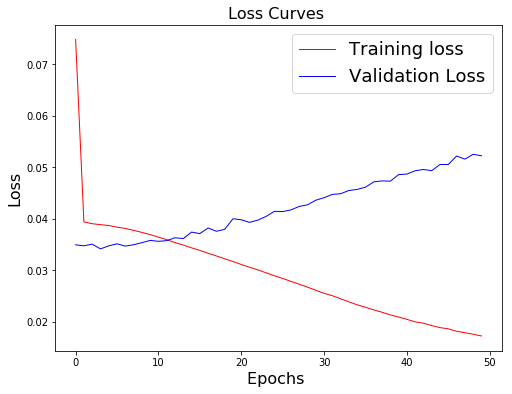

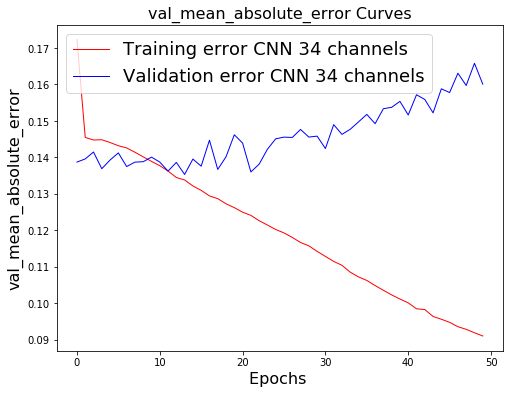

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

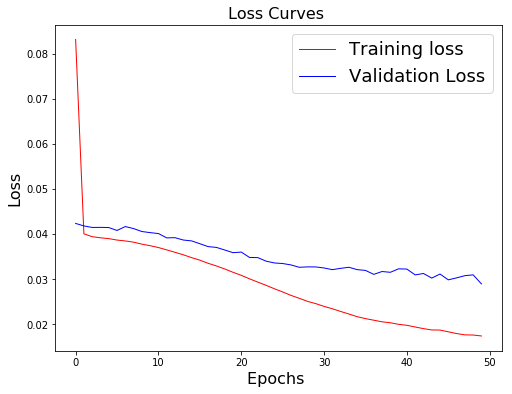

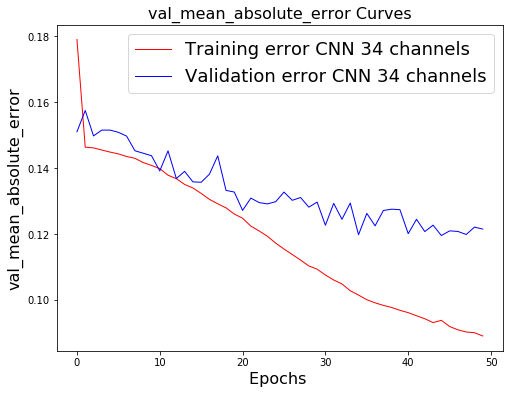

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

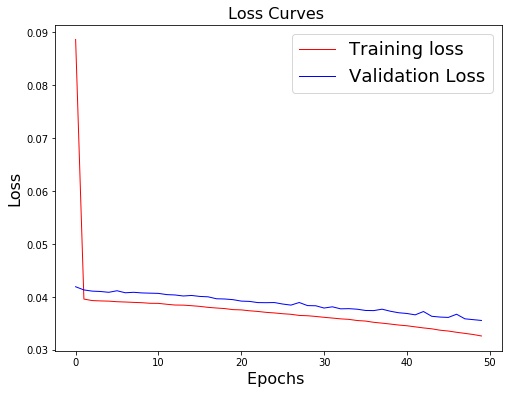

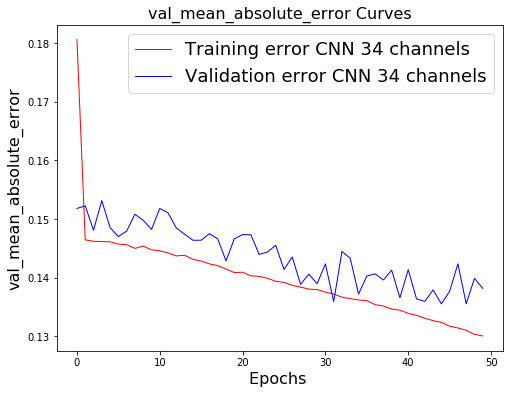

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

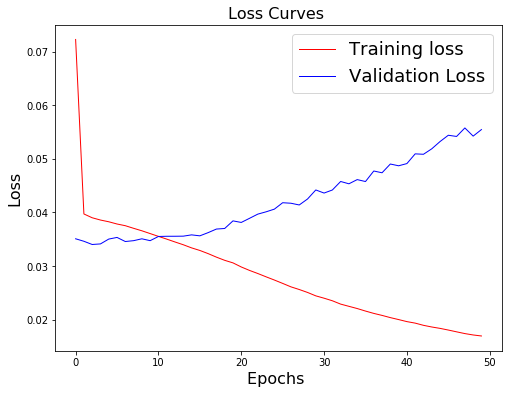

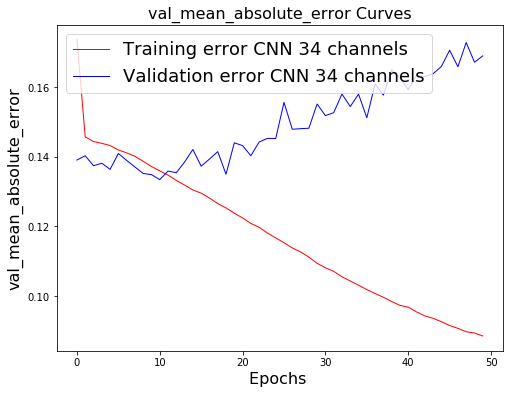

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

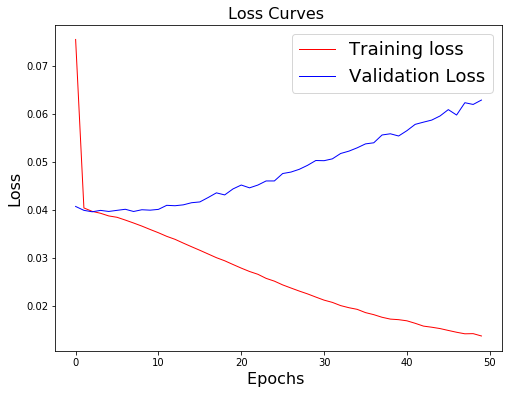

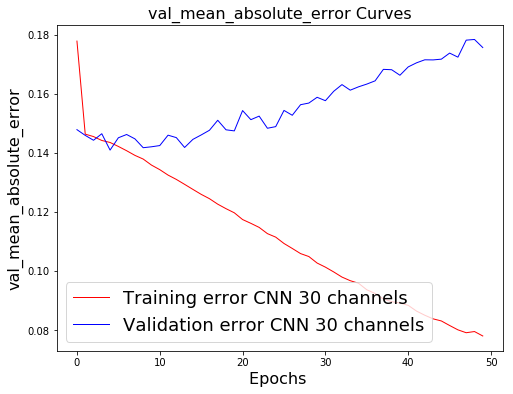

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

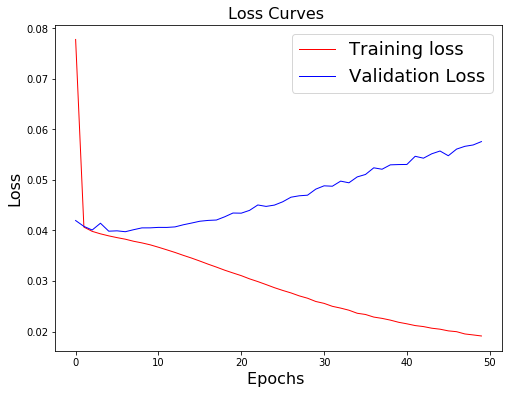

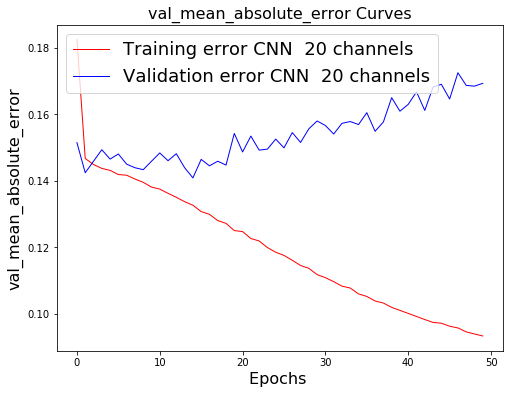

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN  "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

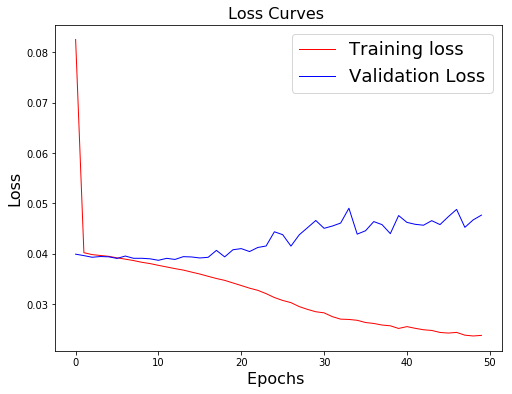

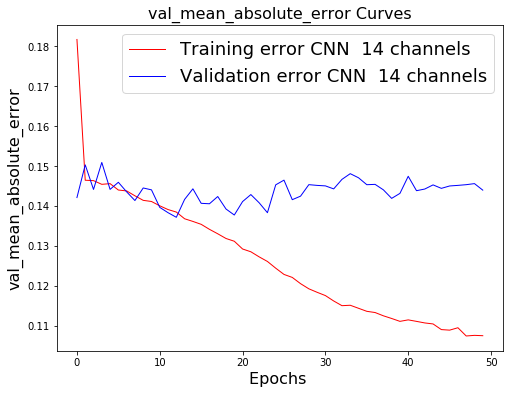

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN  "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

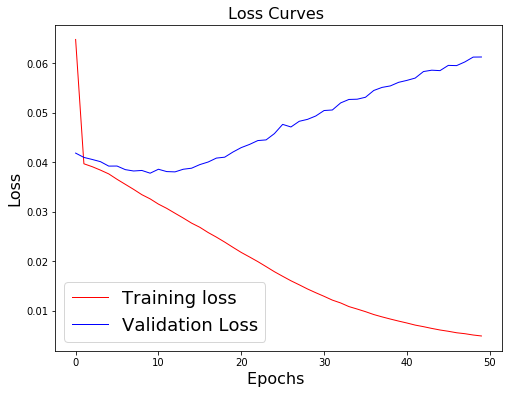

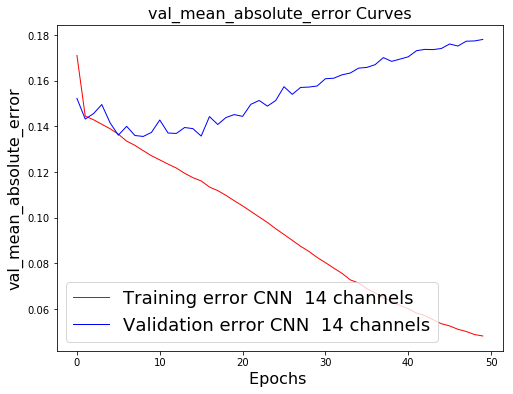

In [4]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN  "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

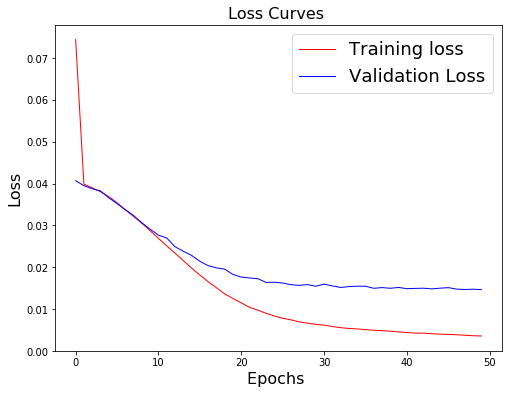

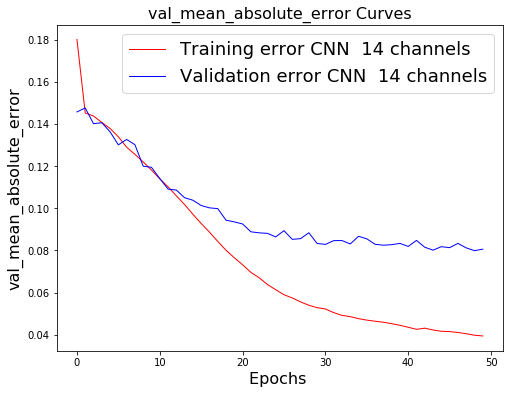

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN  "+str(nb_channel)+" channels"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

    Metric and loss curves are displayed for train and test dataset.

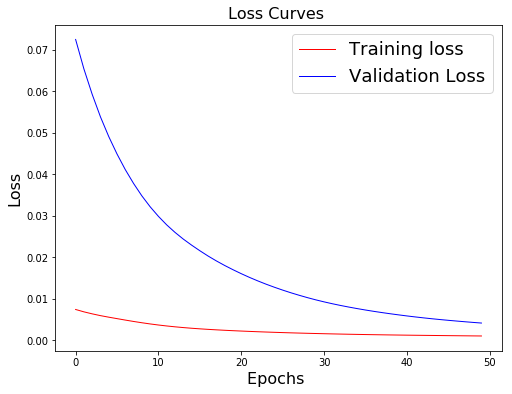

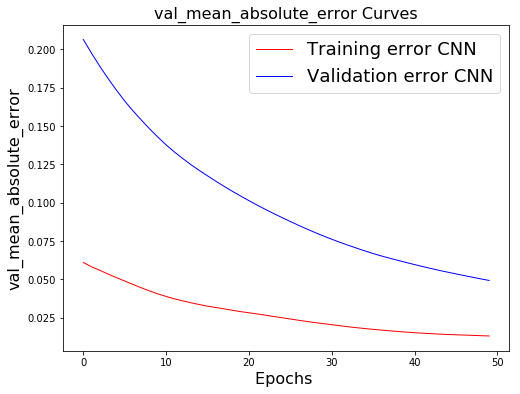

In [4]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

# <font color=blus>4. CNN processing using Keras</font>

    Convolutional layers are built with strides >0 and BOW representation of texts.
    This is equivalent to process Bag Of Words with n-gram.


In [2]:
!ls -alrth ./data/DataPreparator*

-rw-r--r-- 1 bangui bangui 133M août  19 20:44 ./data/DataPreparator_train.dump
-rw-r--r-- 1 bangui bangui 134M août  19 20:44 ./data/DataPreparator_test.dump
-rw-r--r-- 1 bangui bangui 137M août  23 00:43 ./data/DataPreparator_train_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 137M août  23 01:35 ./data/DataPreparator_test_spacy_20000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 22:57 ./data/DataPreparator_train_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 339M août  26 23:32 ./data/DataPreparator_test_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 1,5G août  30 17:08 ./data/DataPreparator_valid_v2_spacy_5000.dump
-rw-r--r-- 1 bangui bangui 335M sept.  1 22:28 ./data/DataPreparator_valid_v2_spacy_15000.dump
-rw-r--r-- 1 bangui bangui 615M sept.  2 18:21 ./data/DataPreparator_train_v2_spacy_15000.dill
-rw-r--r-- 1 bangui bangui 615M sept.  2 22:14 ./data/DataPreparator_valid_v2_spacy_15000.dill
-rw-r--r-- 1 bangui bangui 2,8G sept.  3 14:16 ./data/DataPreparator_valid_v2_spacy_notfidf_1500

In [3]:
import p5_util
if True :
    filename = './data/DataPreparator_train_v2_spacy_notfidf_20000.dill'
    dataPreparator_train = p5_util.object_load(filename)

    filename = './data/DataPreparator_v2_spacy_valid_1000.dill'
    dataPreparator_valid = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_train_v2_spacy_notfidf_20000.dill


Using TensorFlow backend.
/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
W0905 23:20:20.224557 139939886802752 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0905 23:20:20.225244 139939886802752 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0905 23:2

p5_util.object_load : fileName= ./data/DataPreparator_v2_spacy_valid_1000.dill


In [8]:
X_train = dataPreparator_train.X
print(X_train.shape)

X_valid = dataPreparator_valid.X
print(X_valid.shape)

(17366, 300)
(860, 300)


In [14]:
embedding_dim=1
dimension = X_train.shape[1]
dict_param = {
    'dim': (dimension,embedding_dim),
    'batch_size': 100,
    'n_classes': 0,
    'n_channels': 1,
    'shuffle': False
}
#print(dict_param)
for key, value in dict_param.items() :
    print("{} : {}".format(key, value))


dim : (300, 1)
batch_size : 100
n_classes : 0
n_channels : 1
shuffle : False


In [17]:
import test_datapreparator

partition_size=500
train_generator, valid_generator = test_datapreparator.build_generators(dataPreparator_train, \
                     dataPreparator_valid, \
                     partition_size,\
                     dict_param,\
                     data_column_name='vector' ) 

(17366, 300)
Building train partition...

Building test partition...



Ouptput layer dimensions for convolutional network is computed as following : 

*  <code>C = [(I-F + 2*P)/S] +1</code> where :
    * <code>C</code> is the dimension of the ouput convolutional layer;
    * <code>I</code> is the input size
    * <code>F</code> is the convolutional filter size
    * <code>P</code> is the padding size (0 here)
    * <code>S</code> is the srtides

Strides value of <code>S</code> allows to regard a bulk of <code>S</code> consecutive words for sentences patterns exploration. 

For compilation, a learning rate of <code>0.01</code> increases the speed of learning. 

Batch normalization insures a smooth learning.

Batch size is selected in a such way an epoch is formed with 10 mini-batches.

In [18]:
import numpy as np

x = np.load("./data/train_X_0.npy")
x.shape
print("Number of texts in corpus : ...... {}".format(x.shape[0]))
print("Number of words per text : ....... {}".format(x.shape[1]))
#print("Number of dimension per word : ... {}".format(x.shape[2]))

Number of texts in corpus : ...... 500
Number of words per text : ....... 300


In [19]:
x.shape[-2], x.shape[-1]

(500, 300)

In [20]:
X, y = train_generator[0]

print(X[0].shape, y.shape,train_generator.nb_channel)


#print("X Data generator shape : {}".format(X.shape))

(300, 1) (100,) 1


In [22]:
filter_size=9
stride_size=8
dimension = train_generator.dim[0]
print("Expected defaut dimension for 1st hidden layer output : {}".\
      format(round((dimension-filter_size+2*0)/stride_size +1)))
print("")
params = train_generator.get_params()
print("Dimension of inputs= {}".format(params['dim']))
print("Parameters= {}".format(params))

Expected defaut dimension for 1st hidden layer output : 37

Dimension of inputs= (300, 1)
Parameters= {'dim': (300, 1), 'batch_size': 100, 'n_classes': 0, 'n_channels': 1, 'shuffle': False, 'nb_channel': 1}


In [23]:
import p9_util
nb_channel=1
dict_param = train_generator.get_params()
dict_param

{'dim': (300, 1),
 'batch_size': 100,
 'n_classes': 0,
 'n_channels': 1,
 'shuffle': False,
 'nb_channel': 1}

In [24]:
import p9_util

model = p9_util.keras_cnn_build(input_shape=dict_param['dim'], \
                                nbClasses=1, \
                                stride_size=stride_size,\
                                nb_filter=64,\
                                filter_size=filter_size,\
                                lr=1.e-2,\
                                isWordEmbedding=False, \
                                vocab_size = None,\
                                weight_matrix=None, \
                                is_dropout=False,\
                                dropout_rate=0.0, \
                                conv_layer=1, \
                                nb_dense_neuron=16,\
                                dense_layer=1, \
                                pool_size=2)
model.summary()

W0905 23:43:23.232571 139939886802752 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 23:43:23.238045 139939886802752 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 23:43:23.243206 139939886802752 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 23:43:23.332344 139939886802752 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 38, 64)            640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 64)             36928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
__________

In [26]:
# Train model on dataset
history = model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    use_multiprocessing=False,
                    workers=1, verbose=1, epochs=20)

Epoch 1/20
174/174 [==============================] - 3s 20ms/step - loss: 0.0297 - mean_absolute_error: 0.1224 - val_loss: 0.0286 - val_mean_absolute_error: 0.1212
Epoch 2/20
174/174 [==============================] - 3s 20ms/step - loss: 0.0290 - mean_absolute_error: 0.1210 - val_loss: 0.0282 - val_mean_absolute_error: 0.1217
Epoch 3/20
174/174 [==============================] - 4s 22ms/step - loss: 0.0286 - mean_absolute_error: 0.1197 - val_loss: 0.0271 - val_mean_absolute_error: 0.1126
Epoch 4/20
174/174 [==============================] - 4s 20ms/step - loss: 0.0281 - mean_absolute_error: 0.1187 - val_loss: 0.0271 - val_mean_absolute_error: 0.1112
Epoch 5/20
174/174 [==============================] - 4s 21ms/step - loss: 0.0278 - mean_absolute_error: 0.1178 - val_loss: 0.0271 - val_mean_absolute_error: 0.1135
Epoch 6/20
174/174 [==============================] - 4s 22ms/step - loss: 0.0275 - mean_absolute_error: 0.1174 - val_loss: 0.0279 - val_mean_absolute_error: 0.1220
Epoch 7/20

#### CNN model and history are either saved or restored depending a Boolean flag.

`core_name` is a parameter identifying a model through its name.

This name may be changed depending model parameters.

In [27]:
history.history

{'val_loss': [0.028568762592798055,
  0.028204478626680927,
  0.027085079876489417,
  0.027108504588520804,
  0.0271093207736348,
  0.027894093070265857,
  0.028490879118096,
  0.028652780147832492,
  0.026705277044066163,
  0.03160780152782451,
  0.028217528621817745,
  0.028522995452201643,
  0.0274614310108645,
  0.026798599681188893,
  0.026540140816292097,
  0.026294396237231964,
  0.027106940356451413,
  0.026168674013988917,
  0.02642414775178876,
  0.028283932051339816],
 'val_mean_absolute_error': [0.12124881217646044,
  0.12167268125123756,
  0.11255241757215456,
  0.11121690827746723,
  0.11351875077153362,
  0.12198226829600889,
  0.12619407353706139,
  0.12282276898622513,
  0.11297285054312196,
  0.13987833556047705,
  0.12593039523723515,
  0.12284021737963655,
  0.12208676060964894,
  0.11550423693518307,
  0.10738977495321007,
  0.11067672091168027,
  0.11355702890906223,
  0.11362768224505491,
  0.11199239329543224,
  0.11699261221774788],
 'loss': [0.0296778428336843

In [1]:
import keras
import p5_util
core_name = "cnn_6layers"

if False:
    model.save("./data/model_"+core_name+".h5")
    p5_util.object_dump(history, "history_"+core_name+".dump")
    #p5_util.object_dump(max_length, "max_length_"+core_name+".dump")
    
else :
    model = keras.models.load_model("./data/model_"+core_name+".h5")
    history = p5_util.object_load("history_"+core_name+".dump")
    #max_length = p5_util.object_load("max_length_"+core_name+".dump")

#print("\nInput data length= {}".format(max_length))
model.summary()

Using TensorFlow backend.
W0905 23:45:41.293985 140114150356800 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 23:45:41.360784 140114150356800 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 23:45:41.443543 140114150356800 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 23:45:41.444469 140114150356800 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: Th

p5_util.object_load : fileName= history_cnn_6layers.dump
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 38, 64)            640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 64)             36928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)    

    Metric and loss curves are displayed for train and test dataset.

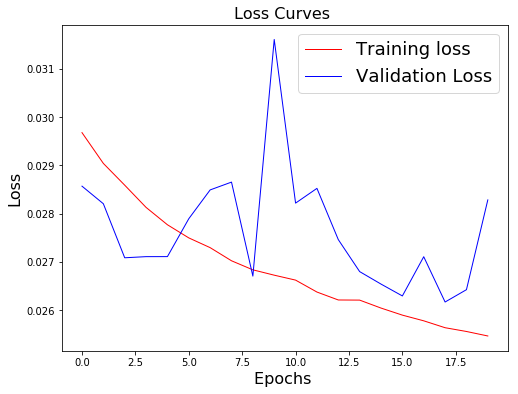

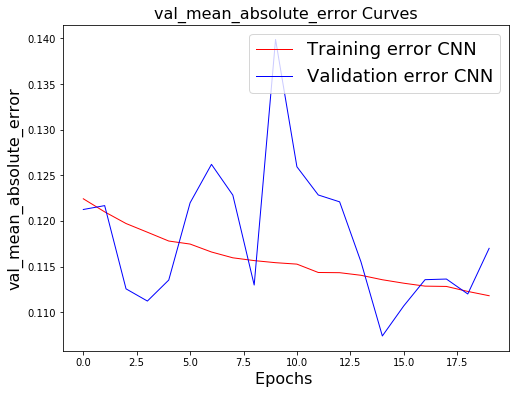

In [3]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN"

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=history, legend=legend)

In [ ]:
import p9_util

rnnCellType = 'GRU'

model = p9_util.keras_rnn_build(rnnCellType, cell_units, max_length, isWordEmbedding=False\
                   , nbClasses=1)

# K-folds with DataGenerator

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

### Save/Restore `DataGenerator` objects

    DataGenerator object for validation is issued from DataGenerator object for training.
    Both objects works in a K-fold train/validation model

In [6]:
import p5_util

filename_train = './data/train_generator.dill'
filename_valid = './data/valid_generator.dill'
if True:
    train_generator = p5_util.object_load(filename_train)
    valid_generator = p5_util.object_load(filename_valid)
else : 
    p5_util.object_dump(datagenerator_train, filename_train)
    p5_util.object_dump(datagenerator_valid, filename_valid)
    

p5_util.object_load : fileName= ./data/train_generator.dill
p5_util.object_load : fileName= ./data/valid_generator.dill


In [ ]:
import DataGenerator
datagenerator_valid = DataGenerator.DataGenerator(valid_generator.dict_X, \
                                            valid_generator.dict_label, \
                                            valid_generator.nb_record,\
                                           other = valid_generator)

import DataGenerator
valid_generator = DataGenerator.DataGenerator(datagenerator_valid.dict_X, \
                                            datagenerator_valid.dict_label, \
                                            datagenerator_valid.nb_record,\
                                           other = datagenerator_valid)

In [6]:
import DataGenerator
datagenerator_train = DataGenerator.DataGenerator(train_generator.dict_X, \
                                            train_generator.dict_label, \
                                            train_generator.nb_record,\
                                           other = train_generator)

import DataGenerator
train_generator = DataGenerator.DataGenerator(datagenerator_train.dict_X, \
                                            datagenerator_train.dict_label, \
                                            datagenerator_train.nb_record,\
                                           other = datagenerator_train)

In [2]:
train_generator.n_classes = 2
train_generator.get_params()

{'keras_input_dim': (40, 166),
 'batch_size': 500,
 'n_classes': 2,
 'n_channels': 0,
 'is_shuffle': False,
 'keras_nb_channel': 0,
 'list_keras_channel': [],
 'data_type': 'train',
 'proj_dimension': None,
 'is_dimension_mux': False}

In [3]:
import p9_util_keras
p9_util_keras.keras_model_evaluate_kfold(train_generator, batch_count = None)

W0930 09:51:44.551819 140365840451392 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 09:51:44.555331 140365840451392 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 09:51:44.562919 140365840451392 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 09:51:44.591632 140365840451392 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is d


dict_param_keras {'input_dim': (40, 166), 'batch_size': 500, 'nb_epoch': 1, 'verbose': 1, 'dropout_rate': 0.0, 'is_batch_normalized': True, 'lr': 0.01, 'nbClasses': 2}
filter_size 3
stride_size 1
pool_size 2
pool_stride 2
nb_filter 256
conv_layer 4
nb_dense_neuron 128
dense_layer 1
dense_layer_decrease_rate 2
list_channel []
list_filter_channel []


W0930 09:51:45.120980 140365840451392 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0930 09:51:45.125845 140365840451392 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0930 09:51:45.129937 140365840451392 deprecation.py:323] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Batch ID= 0/173
Epoch 1/1
172/172 [==============================] - 67s 392ms/step - loss: 0.5482 - binary_accuracy: 0.7316 - val_loss: 0.5356 - val_binary_accuracy: 0.7420
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_0.dill

Batch ID= 1/173
Epoch 1/1
172/172 [==============================] - 64s 373ms/step - loss: 0.4471 - binary_accuracy: 0.7944 - val_loss: 0.4754 - val_binary_accuracy: 0.7660
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_1.dill

Batch ID= 2/173
Epoch 1/1
172/172 [==============================] - 65s 379ms/step - loss: 0.3701 - binary_accuracy: 0.8401 - val_loss: 0.3140 - val_binary_accuracy: 0.8680
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_2.dill

Batch ID= 3/173
Epoch 1/1
172/172 [==============================] - 67s 391ms/step - loss: 0.2623 - binary_accuracy: 0.8945 - val_loss: 0.2542 - val_binary_accuracy: 0.88

172/172 [==============================] - 68s 393ms/step - loss: 4.8289e-05 - binary_accuracy: 1.0000 - val_loss: 5.5227e-05 - val_binary_accuracy: 1.0000
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_58.dill

Batch ID= 59/173
Epoch 1/1
172/172 [==============================] - 60s 352ms/step - loss: 4.7211e-05 - binary_accuracy: 1.0000 - val_loss: 5.3686e-05 - val_binary_accuracy: 1.0000
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_59.dill

Batch ID= 60/173
Epoch 1/1
172/172 [==============================] - 62s 362ms/step - loss: 4.6242e-05 - binary_accuracy: 1.0000 - val_loss: 5.2449e-05 - val_binary_accuracy: 1.0000
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_60.dill

Batch ID= 61/173
Epoch 1/1
172/172 [==============================] - 57s 329ms/step - loss: 4.5373e-05 - binary_accuracy: 1.0000 - val_loss: 5.1747e-05 - val_binary_acc

172/172 [==============================] - 62s 361ms/step - loss: 2.9521e-05 - binary_accuracy: 1.0000 - val_loss: 3.4532e-05 - val_binary_accuracy: 1.0000
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_87.dill

Batch ID= 88/173
Epoch 1/1
172/172 [==============================] - 59s 345ms/step - loss: 2.9107e-05 - binary_accuracy: 1.0000 - val_loss: 3.4416e-05 - val_binary_accuracy: 1.0000
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_88.dill

Batch ID= 89/173
Epoch 1/1
172/172 [==============================] - 59s 344ms/step - loss: 2.8668e-05 - binary_accuracy: 1.0000 - val_loss: 3.4023e-05 - val_binary_accuracy: 1.0000
object_dump: file name= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch_89.dill

Batch ID= 90/173
Epoch 1/1
172/172 [==============================] - 59s 341ms/step - loss: 2.8407e-05 - binary_accuracy: 1.0000 - val_loss: 3.3262e-05 - val_binary_acc

KeyboardInterrupt: 

### Build score history

#### Binary score for unbalanced classes

In [1]:
import p5_util
#core_name = p9_util_keras.build_model_core_name(dict_param_keras_cnn)
#batch_index = 2
#filename = "./data/ddict_history_kfold_"+core_name+"_"+str(batch_index)+".dill"
filename = "./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.2_nbn128_Lch_96.dill"
ddict_history_kfold_ = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/ddict_history_kfold__f3_s1_p2_nbf256_cnv4_d1_dor0.2_nbn128_Lch_96.dill


In [2]:
import p9_util_config
dict_param_keras_cnn = p9_util_config.dict_param_keras_cnn

epochs = dict_param_keras_cnn['dict_param_keras']['nb_epoch']

In [3]:
import p9_util_keras
df_history_score = p9_util_keras.build_df_history_score_from_kfold(ddict_history_kfold_, epochs)

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.
W0930 11:23:27.812013 140320858056512 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0930 11:23:27.812796 140320858056512 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0930 11:2

In [4]:
import p9_util_keras

keras_history = p9_util_keras.build_keras_history_from_df_score(df_history_score)

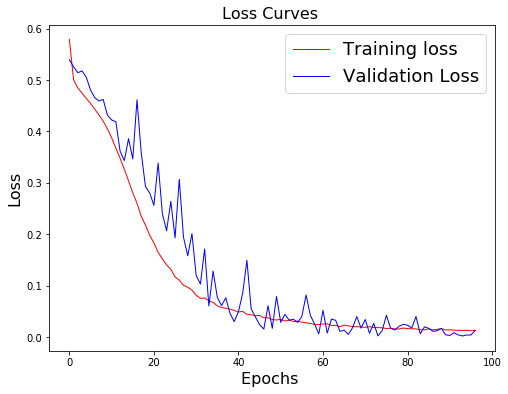

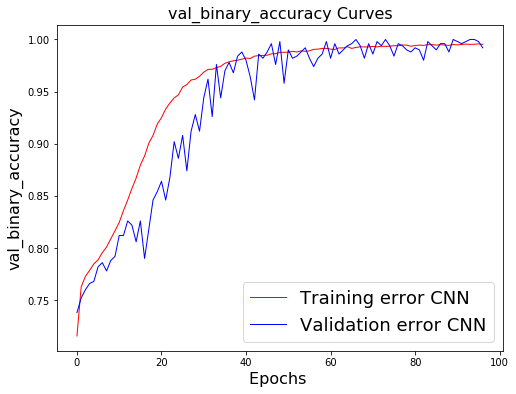

In [5]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=keras_history, legend=legend)

#### Model performance with 1000 observations for validation

W0930 11:28:42.361657 140320858056512 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 11:28:42.369131 140320858056512 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 11:28:42.384021 140320858056512 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0930 11:28:42.443617 140320858056512 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Pl

[0, 1]

Confusion matrix for all classes : 

[[490  98]
 [139 120]]

Normalized confusion matrix
[[0.83333333 0.16666667]
 [0.53667954 0.46332046]]
Confusion matrix, without normalization
[[490  98]
 [139 120]]

TP rate = [0.         0.46332046 1.        ]
FP rate = [0.         0.16666667 1.        ]


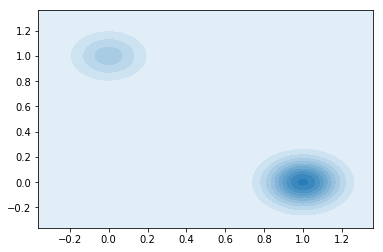

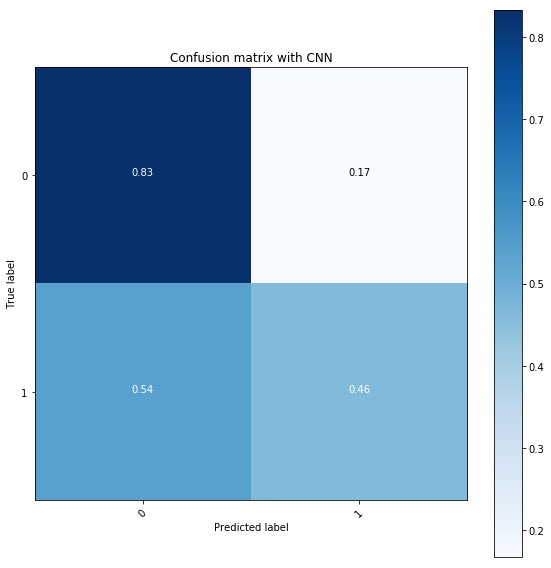

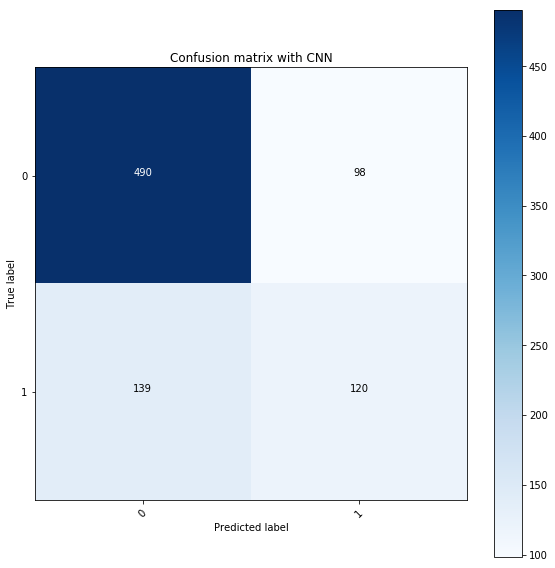

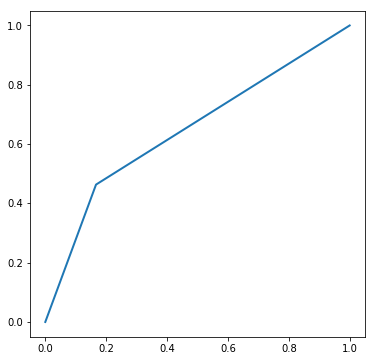

In [9]:
import numpy as np
import keras
import p9_util

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.0_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y

y_valid_label = keras.utils.to_categorical(y_valid, num_classes=2,dtype='int')
y_predict = np.round(model.predict(X_valid))
#y_predict = model.predict(X_valid)
#y_predict = model.predict_generator(valid_generator)

y_= p9_util.display_class_performance(model, X_valid, y_valid_label, is_binary=True, \
                                      y_pred=y_predict, \
                                      title="Confusion matrix with CNN")

### Model performance with 10000 observations for validation

#### Load `DataPreparator` object

In [1]:
import p5_util
import test_datapreparator
import p5_util
data_type = 'valid'
dict_param_sequence = p5_util.object_load('./data/dict_param_sequence_valid_10000.dump')
valid_filename = test_datapreparator.datapreparator_filename(data_type, dict_param_sequence, step=None)
print(valid_filename)


dataPreparator_v2_valid = p5_util.object_load(valid_filename)

# Remove duplicated indexes
dataPreparator_v2_valid.df_data = \
dataPreparator_v2_valid.df_data.loc[~dataPreparator_v2_valid.df_data.index.duplicated(keep='first')]

/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.
W0930 14:54:58.236168 140590069139264 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0930 14:54:58.236860 140590069139264 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W0930 14:5

p5_util.object_load : fileName= ./data/dict_param_sequence_valid_10000.dump
./data/DataPreparator_v2_40Tokens_spacy__en_core_web_lg__valid_10000.dill
p5_util.object_load : fileName= ./data/DataPreparator_v2_40Tokens_spacy__en_core_web_lg__valid_10000.dill


#### Update `DataPreparator` target to binary labels

In [2]:
dataPreparator_v2_valid.targetUpdate2BinaryLabel()

/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
import p9_util
import p9_util_config

#----------------------------------------------------------------------------
# Common parameters for DataGenerator objects.
#----------------------------------------------------------------------------
dict_param_generator = p9_util_config.dict_param_generator
dict_param_generator

nbClasses =  dataPreparator_v2_valid.df_data.target.max()-dataPreparator_v2_valid.df_data.target.min()+1

dict_param_generator['n_classes'] = nbClasses
dict_param_generator

{'data_type': 'valid',
 'partition_size': 100,
 'is_dimension_mux': False,
 'proj_dimension': None,
 'batch_size': 100,
 'n_classes': 2,
 'n_channels': 0,
 'is_shuffle': False,
 'keras_nb_channel': 1,
 'list_keras_channel': [],
 'keras_input_dim': (None, None)}

In [4]:
!rm ./data/valid_X_*.*    
import test_datapreparator

data_type = 'valid'
#----------------------------------------------------------------------------
# DataGenerator for validation dataset configuration
#----------------------------------------------------------------------------
dict_param_generator['partition_size'] = dict_param_sequence['dict_param_step'][2]['bulk_row']
dict_param_generator['partition_size'] = 500
dict_param_generator['batch_size'] = 500
dict_param_generator['data_type'] = data_type

#----------------------------------------------------------------------------
#  Filename issued from automated process of data preparation.
#  Filename is built from automated data-preparation configuration, 
# implemented into dictionary dict_param_sequence.
#----------------------------------------------------------------------------
filename_datapreparator = test_datapreparator.datapreparator_filename(data_type,dict_param_sequence, step=None)

#----------------------------------------------------------------------------
# Parameters configuration in order to build Datagenerator object for 
# validation dataset.
#----------------------------------------------------------------------------
percent_var = 0.0
dict_cnn_preprocess={
    'filename_datapreparator' : filename_datapreparator,\
    'percent_var' : percent_var,\
}
valid_generator = test_datapreparator.build_cnn_datagenerator(**dict_cnn_preprocess,\
                                                             dataPreparator_v2 = dataPreparator_v2_valid,\
                                                             dict_param_generator = dict_param_generator)

Using DataPreparator given as parameter...

DataPreparator Dataframe shape= (8617, 1)

Components= 0 for variance= 0.0%
p5_util.object_load : fileName= ./data/df_data_df_valid_10000_step2_8.dill

data_type : valid
partition_size : 500
is_dimension_mux : False
proj_dimension : None
batch_size : 500
n_classes : 2
n_channels : 0
is_shuffle : False
keras_nb_channel : 0
list_keras_channel : []
keras_input_dim : (40, 166)

Building datagenerator...

*** Partition size = 500
p5_util.object_load : fileName= ./data/df_data_df_valid_10000_step2_0.dill
Building valid partition...

p5_util.object_load : fileName= ./data/df_data_df_valid_10000_step2_1.dill
Building valid partition...

p5_util.object_load : fileName= ./data/df_data_df_valid_10000_step2_2.dill
Building valid partition...

p5_util.object_load : fileName= ./data/df_data_df_valid_10000_step2_3.dill
Building valid partition...

p5_util.object_load : fileName= ./data/df_data_df_valid_10000_step2_4.dill
Building valid partition...

p5_util

/home/bangui/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packa

[0, 1]

Confusion matrix for all classes : 

[[5440  502]
 [1601 1074]]

Normalized confusion matrix
[[0.91551666 0.08448334]
 [0.59850467 0.40149533]]
Confusion matrix, without normalization
[[5440  502]
 [1601 1074]]

TP rate = [0.         0.40149533 1.        ]
FP rate = [0.         0.08448334 1.        ]


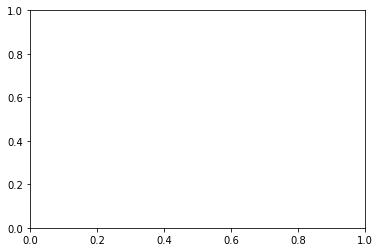

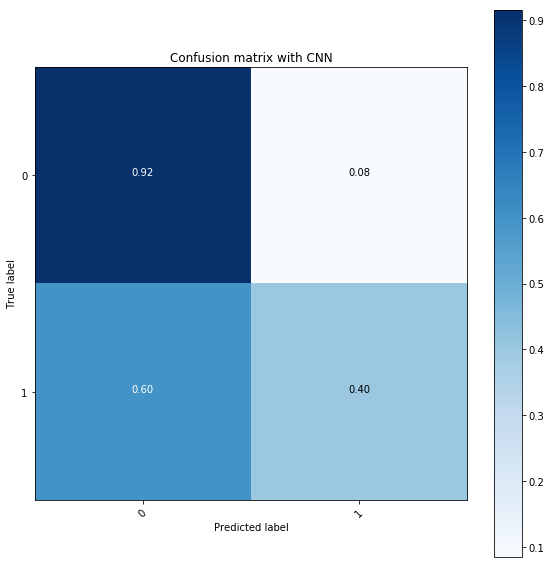

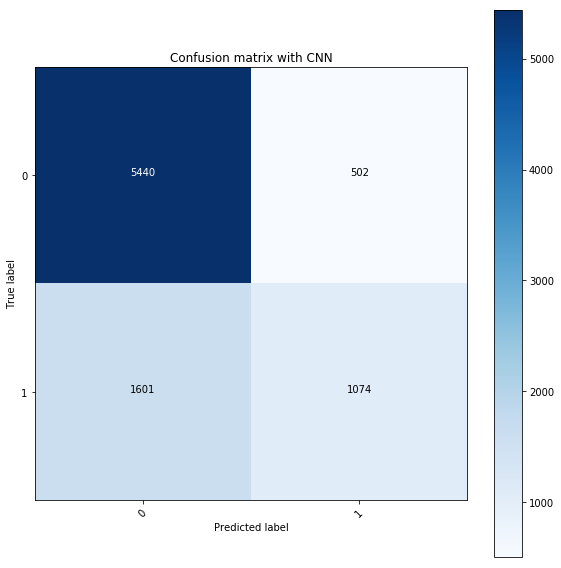

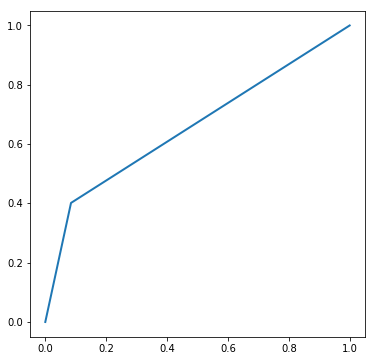

In [6]:
import numpy as np
import keras
import p9_util

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.2_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid_label = y_valid
#y_valid_label = keras.utils.to_categorical(y_valid, num_classes=2,dtype='int')
y_predict = np.round(model.predict(X_valid))
#y_predict = model.predict(X_valid)
#y_predict = model.predict_generator(valid_generator)

y_= p9_util.display_class_performance(model, X_valid, y_valid_label, is_binary=True, \
                                      y_pred=y_predict, \
                                      title="Confusion matrix with CNN")

### Model performance with 5000 observations for validation

#### Load `DataPreparator` object

In [2]:
import p5_util
import test_datapreparator
import p5_util
data_type = 'valid'
dict_param_sequence = p5_util.object_load('./data/dict_param_sequence_'+str(data_type)+'.dump')
valid_filename = test_datapreparator.datapreparator_filename(data_type, dict_param_sequence, step=None)
print(valid_filename)


dataPreparator_v2_valid = p5_util.object_load(valid_filename)

# Remove duplicated indexes
dataPreparator_v2_valid.df_data = \
dataPreparator_v2_valid.df_data.loc[~dataPreparator_v2_valid.df_data.index.duplicated(keep='first')]

p5_util.object_load : fileName= ./data/dict_param_sequence_valid.dump
./data/DataPreparator_v2_40Tokens_spacy__en_core_web_lg__valid_5000.dill
p5_util.object_load : fileName= ./data/DataPreparator_v2_40Tokens_spacy__en_core_web_lg__valid_5000.dill


#### Update `DataPreparator` target to binary labels

In [3]:
dataPreparator_v2_valid.targetUpdate2BinaryLabel()

/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
import p9_util
import p9_util_config

#----------------------------------------------------------------------------
# Common parameters for DataGenerator objects.
#----------------------------------------------------------------------------
dict_param_generator = p9_util_config.dict_param_generator
dict_param_generator

nbClasses =  dataPreparator_v2_valid.df_data.target.max()-dataPreparator_v2_valid.df_data.target.min()+1

dict_param_generator['n_classes'] = nbClasses
dict_param_generator

{'data_type': 'valid',
 'partition_size': 100,
 'is_dimension_mux': False,
 'proj_dimension': None,
 'batch_size': 100,
 'n_classes': 2,
 'n_channels': 0,
 'is_shuffle': False,
 'keras_nb_channel': 1,
 'list_keras_channel': [],
 'keras_input_dim': (None, None)}

In [5]:
!rm ./data/valid_X_*.*    
import test_datapreparator

data_type = 'valid'
#----------------------------------------------------------------------------
# DataGenerator for validation dataset configuration
#----------------------------------------------------------------------------
dict_param_generator['partition_size'] = dict_param_sequence['dict_param_step'][2]['bulk_row']
dict_param_generator['partition_size'] = 500
dict_param_generator['batch_size'] = 500
dict_param_generator['data_type'] = data_type

#----------------------------------------------------------------------------
#  Filename issued from automated process of data preparation.
#  Filename is built from automated data-preparation configuration, 
# implemented into dictionary dict_param_sequence.
#----------------------------------------------------------------------------
filename_datapreparator = test_datapreparator.datapreparator_filename(data_type,dict_param_sequence, step=None)

#----------------------------------------------------------------------------
# Parameters configuration in order to build Datagenerator object for 
# validation dataset.
#----------------------------------------------------------------------------
percent_var = 0.0
dict_cnn_preprocess={
    'filename_datapreparator' : filename_datapreparator,\
    'percent_var' : percent_var,\
}
valid_generator = test_datapreparator.build_cnn_datagenerator(**dict_cnn_preprocess,\
                                                             dataPreparator_v2 = dataPreparator_v2_valid,\
                                                             dict_param_generator = dict_param_generator)

rm: impossible de supprimer './data/valid_X_*.*': Aucun fichier ou dossier de ce type
Using DataPreparator given as parameter...

DataPreparator Dataframe shape= (4292, 1)

Components= 0 for variance= 0.0%
p5_util.object_load : fileName= ./data/df_data_df_valid_5000_step2_4.dill

data_type : valid
partition_size : 500
is_dimension_mux : False
proj_dimension : None
batch_size : 500
n_classes : 2
n_channels : 0
is_shuffle : False
keras_nb_channel : 0
list_keras_channel : []
keras_input_dim : (40, 166)

Building datagenerator...

*** Partition size = 500
p5_util.object_load : fileName= ./data/df_data_df_valid_5000_step2_0.dill
Building valid partition...

p5_util.object_load : fileName= ./data/df_data_df_valid_5000_step2_1.dill
Building valid partition...

p5_util.object_load : fileName= ./data/df_data_df_valid_5000_step2_2.dill
Building valid partition...

p5_util.object_load : fileName= ./data/df_data_df_valid_5000_step2_3.dill
Building valid partition...

p5_util.object_load : fileName

W0930 13:51:12.366684 140572760090432 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 13:51:12.370614 140572760090432 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 13:51:12.387326 140572760090432 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0930 13:51:12.454670 140572760090432 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Pl

[0, 1]

Confusion matrix for all classes : 

[[2677  235]
 [ 794  586]]

Normalized confusion matrix
[[0.91929945 0.08070055]
 [0.57536232 0.42463768]]
Confusion matrix, without normalization
[[2677  235]
 [ 794  586]]

TP rate = [0.         0.42463768 1.        ]
FP rate = [0.         0.08070055 1.        ]


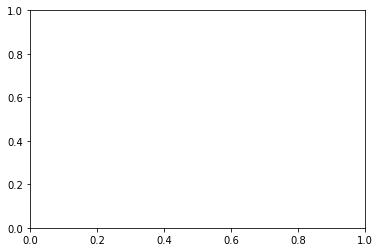

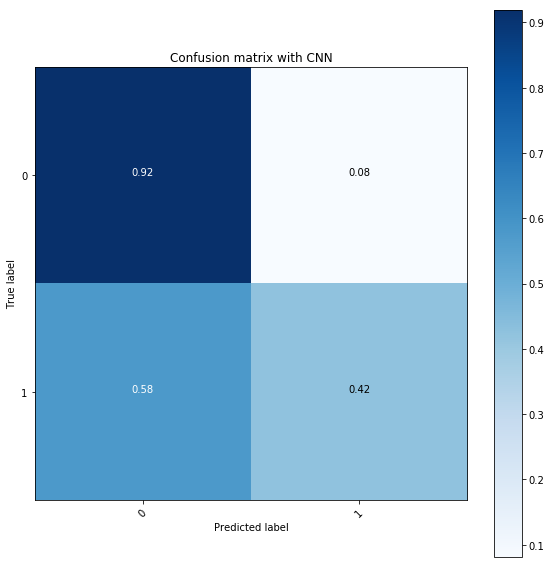

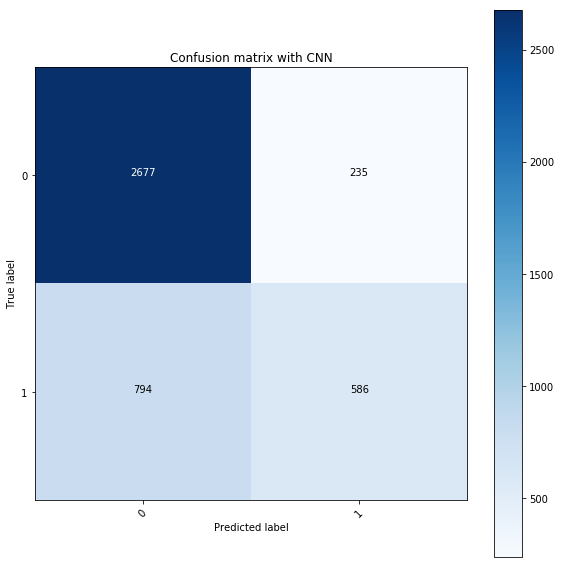

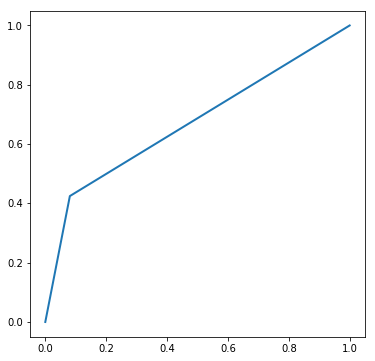

In [7]:
import numpy as np
import keras
import p9_util

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.2_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y
y_valid_label = y_valid
#y_valid_label = keras.utils.to_categorical(y_valid, num_classes=2,dtype='int')
y_predict = np.round(model.predict(X_valid))
#y_predict = model.predict(X_valid)
#y_predict = model.predict_generator(valid_generator)

y_= p9_util.display_class_performance(model, X_valid, y_valid_label, is_binary=True, \
                                      y_pred=y_predict, \
                                      title="Confusion matrix with CNN")

### Model performance with dropout rate =0.2

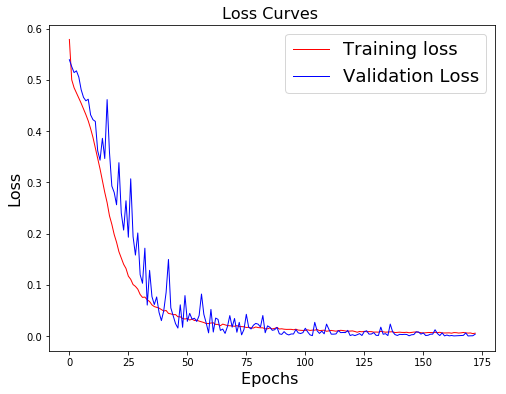

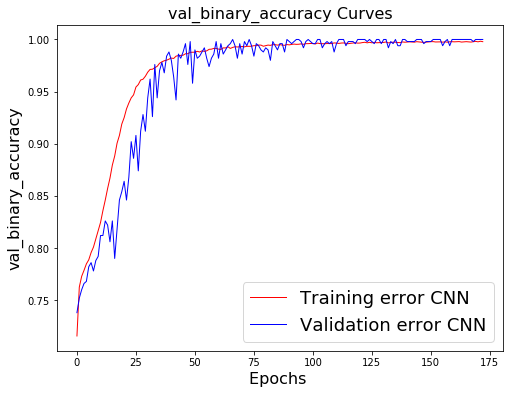

In [5]:
import p7_util
#legend='length='+str(max_length)
legend = "CNN"
model = None

list_model_acc_value = p7_util.p7_plot_cnn_history(model, None, None, history=keras_history, legend=legend)

#### Model performance with 1000 observations for validation

/home/bangui/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/bangui/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/bangui/anaconda3/envs/python36/lib/python3.6/site-packa

[0, 1]

Confusion matrix for all classes : 

[[529  59]
 [160  99]]

Normalized confusion matrix
[[0.89965986 0.10034014]
 [0.61776062 0.38223938]]
Confusion matrix, without normalization
[[529  59]
 [160  99]]

TP rate = [0.         0.38223938 1.        ]
FP rate = [0.         0.10034014 1.        ]


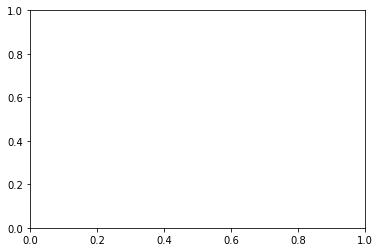

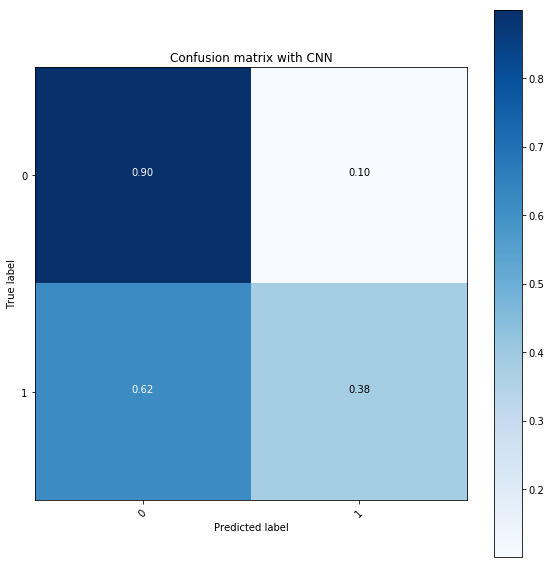

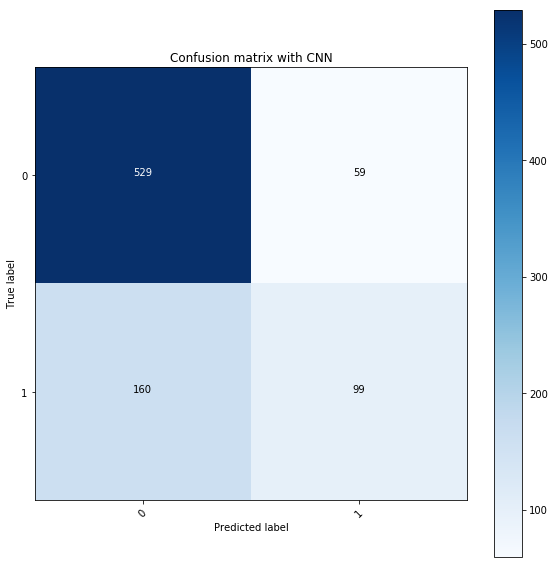

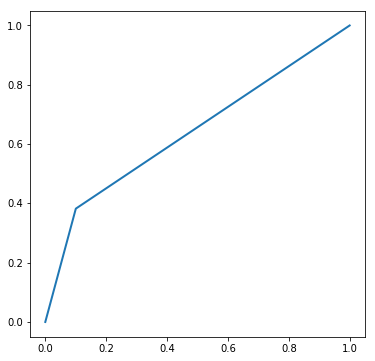

In [13]:
import numpy as np
import keras
import p9_util

filename_model = "./data/model__f3_s1_p2_nbf256_cnv4_d1_dor0.2_nbn128_Lch.h5"
model = keras.models.load_model(filename_model)

X_valid = valid_generator.X
y_valid = valid_generator.y

y_valid_label = keras.utils.to_categorical(y_valid, num_classes=2,dtype='int')
y_predict = np.round(model.predict(X_valid))
#y_predict = model.predict(X_valid)
#y_predict = model.predict_generator(valid_generator)

y_= p9_util.display_class_performance(model, X_valid, y_valid_label, is_binary=True, \
                                      y_pred=y_predict, \
                                      title="Confusion matrix with CNN")

In [80]:
X_valid = datagenerator.X
X_valid.shape

(847, 40, 166)

In [42]:
import numpy as np
np.where(y_predict>0.9)[0].shape, len(y_predict), len(y)

((126,), 847, 847)

In [54]:
mse = (y_predict**2 - y**2)
y_predict.shape, y

((847, 1), (847,))

In [56]:
y[:10]

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

In [57]:
y_predict[:10]

array([[ 0.03071609],
       [ 0.78414416],
       [ 0.7997147 ],
       [ 0.91341054],
       [ 0.4612867 ],
       [-0.03072724],
       [-0.02187535],
       [-0.00729236],
       [-0.03098425],
       [ 0.46291497]], dtype=float32)

In [60]:
import p5_util
filename = "./data/DataPreparator_v2_40Tokens_spacy__en_core_web_lg__valid_1000.dill"
dataprep = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/DataPreparator_v2_40Tokens_spacy__en_core_web_lg__valid_1000.dill


In [62]:
y = dataprep.y

In [63]:
y[:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [11]:
valid_generator.y[:10]

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

['_DataGenerator__data_generation',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_index_oov',
 '_get_is_training',
 '_get_y',
 '_index_oov',
 '_is_training',
 '_set_index_oov',
 '_set_is_training',
 '_set_y',
 'batch_size',
 'data_generation',
 'data_type',
 'dict_X',
 'dict_handle_listfileindex',
 'dict_label',
 'get_Xproj_y_from_generator',
 'get_batch_index',
 'get_dict_handle_listindex',
 'get_params',
 'index_oov',
 'indexes',
 'is_dimension_mux',
 'is_shuffle',
 'is_training',
 'keras_input_dim',
 'keras_nb_channel',
 'list_index_map',
 'list_keras_channel',
 'n_channels',
 'n_classes',
 'nb_record',
 'on_epoch_end

In [15]:
train_generator.y[:10]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0.])

In [18]:
valid_generator.dict_label

{'./data/valid_X_0.npy': array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 